# Table of contents
0. Introduction  
    0.1. Load the dataset  
    * missing value 확인 및 처리
    * statistical value 확인
    * Label의 class 종류 및 count 확인
    * correlations 확인
1. DL  
   1.0.0. Split the dataset
   *  into features(X) and label(y)
   *  into X_train, X_test, y_train, y_test
   
   1.0.1. Standardization
     
   1.1. CNN; Convolutional Neural Network
   * Convert to Sequential Data

# 0. Introduction

**Dataset**  
* [diabetes(당뇨병)](https://github.com/MyungKyuYi/AI-class/blob/main/diabetes.csv)

**Environment**
* macOS `x86`cpu

**Framework**  
* TensorFlow: Version `2.10.0`

**Dependencies**  
* Python: Version `3.9.19`
* Numpy: Version `1.24.3`
* Pandas: Version `2.2.2`
* Matplotlib: Version `3.9.2`
* scikit-learn: Version `1.2.2`

**Purpose**
* 당뇨병 데이터에 대해서 CNN을 사용하여 Classification 진행한다.

## 0.1. Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv('./datasets/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
# dataset의 shape, columns 확인
print(f"Shape  : {df.shape}")
print(f"Columns: {df.columns}")

# 해당 dataset은 column의 수가 많지 않지만, 수십 개의 columns가 존재하는 경우라면,
# df나 df.describe()로 한 눈에 확인하기 어려움

Shape  : (768, 9)
Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [5]:
# features description
'''
| Pregnancies               | 임신 횟수
| Glucose                   | 글루코스
| BloodPressure             | 혈압
| SkinThickness             | 삼두근 부위 피부 두께
| Insulin                   | 인슐린 수치
| BMI                       | BMI 수치
| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수
| Age                       | 나이
| Outcome                   | 당뇨 유무
'''

'\n| Pregnancies               | 임신 횟수\n| Glucose                   | 글루코스\n| BloodPressure             | 혈압\n| SkinThickness             | 삼두근 부위 피부 두께\n| Insulin                   | 인슐린 수치\n| BMI                       | BMI 수치\n| DiabetesPedigreeFunction  | 당뇨 유전병 인자 함수\n| Age                       | 나이\n| Outcome                   | 당뇨 유무\n'

In [8]:
# Check the missing value

# sol1. DataFrame.info()는 Non-Null Count & Dtype을 리턴함
print(df.info())
print("\n\n")

# sol2. DataFrame.isnull().sum()은 Null Count를 리턴함 -> Null 확인에는 더 직관적임
print(df.isnull().sum())
print("\n\n")

# sol3. 또한 이를 응용하여 dataset 전체에 null이 존재하는지 여부를 출력하는 if statement를 작성 가능
if (df.isnull().sum().sum() == 0): 
    print("There are no missing values.")
else:
    print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                   

In [9]:
# missing value 처리하기
# null이 존재한다면 자동으로 처리하는 if statement를 작성 가능.
# 해당 예제에서는 missing value를 '제거'하도록 작성함. 이외에도 missing value 처리 방법은 다양함.
if (df.isnull().sum().sum() == 0):
    print("There are no missing values.")
else:
    print("missing values가 존재하여 처리합니다. \n처리 방법: 삭제")
    df = df.dropna()

# 해당 dataset에는 missing value가 존재하지 않기 때문에 별도로 작동하지는 않음

There are no missing values.


> **cf. [pandas.DataFrame.dropna — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**  
`DataFrame.dropna(*, axis=0, how=_NoDefault.no_default, thresh=_NoDefault.no_default, subset=None, inplace=False, ignore_index=False)`  
Remove missing values.

> **cf. [누락 데이터(Missing value)를 처리하는 7가지 방법 / Data Imputation - 밥먹는 개발자](https://dining-developer.tistory.com/19)**

In [11]:
# DataFrame.describe()는 dataset에 대한 statistical values를 제공함
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
# Label의 class 종류 및 count 확인
labels = np.unique(df['Outcome'], return_counts=True)
print(labels)

(array([0, 1]), array([500, 268]))


> **cf. [numpy.unique — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)**  
Find the unique elements of an array.  
Returns the sorted unique elements of an array.  
There are three optional outputs in addition to the unique elements:  
> * the indices of the input array that give the unique values
> * the indices of the unique array that reconstruct the input array
> * the number of times each unique value comes up in the input array

In [16]:
# Check the label count - sol1. numeric table
print("\n<label count>")
table = np.vstack(labels).T
print("Outcome  count")
for row in table:
    print(f"{row[0]:7d} {row[1]:6d}")


<label count>
Outcome  count
      0    500
      1    268


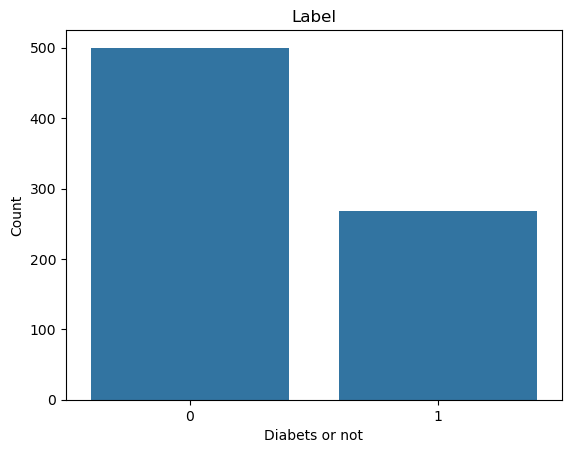

In [17]:
# Check the label count - sol2. graph
sns.countplot(data=df, x='Outcome')
plt.xlabel('Diabets or not')
plt.ylabel('Count')
plt.title('Label')
plt.show()

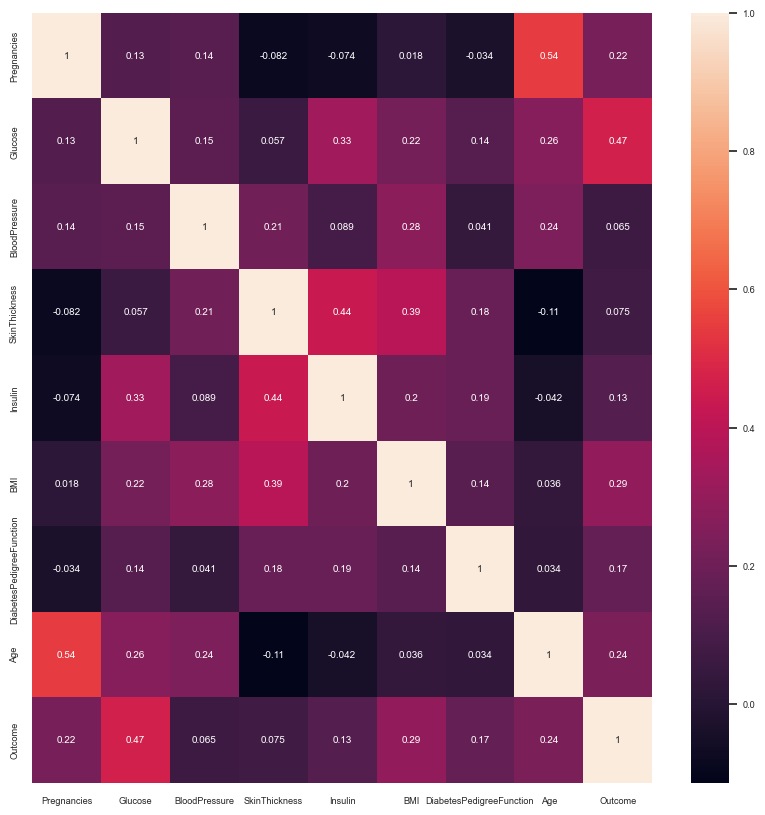

In [19]:
# Check the correlations - sol1. heatmap
# If corr >= 0.3, positive-correlated and if corr >= 0.7, high correlated
# If corr <= -0.3, negative-correlated and if corr <= -0.7, high correlated
df_corr = df.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.6)
sns.heatmap(data=df_corr, annot=True)
plt.show()

# 'Glucose' is positive-correlated with 'Outcome'

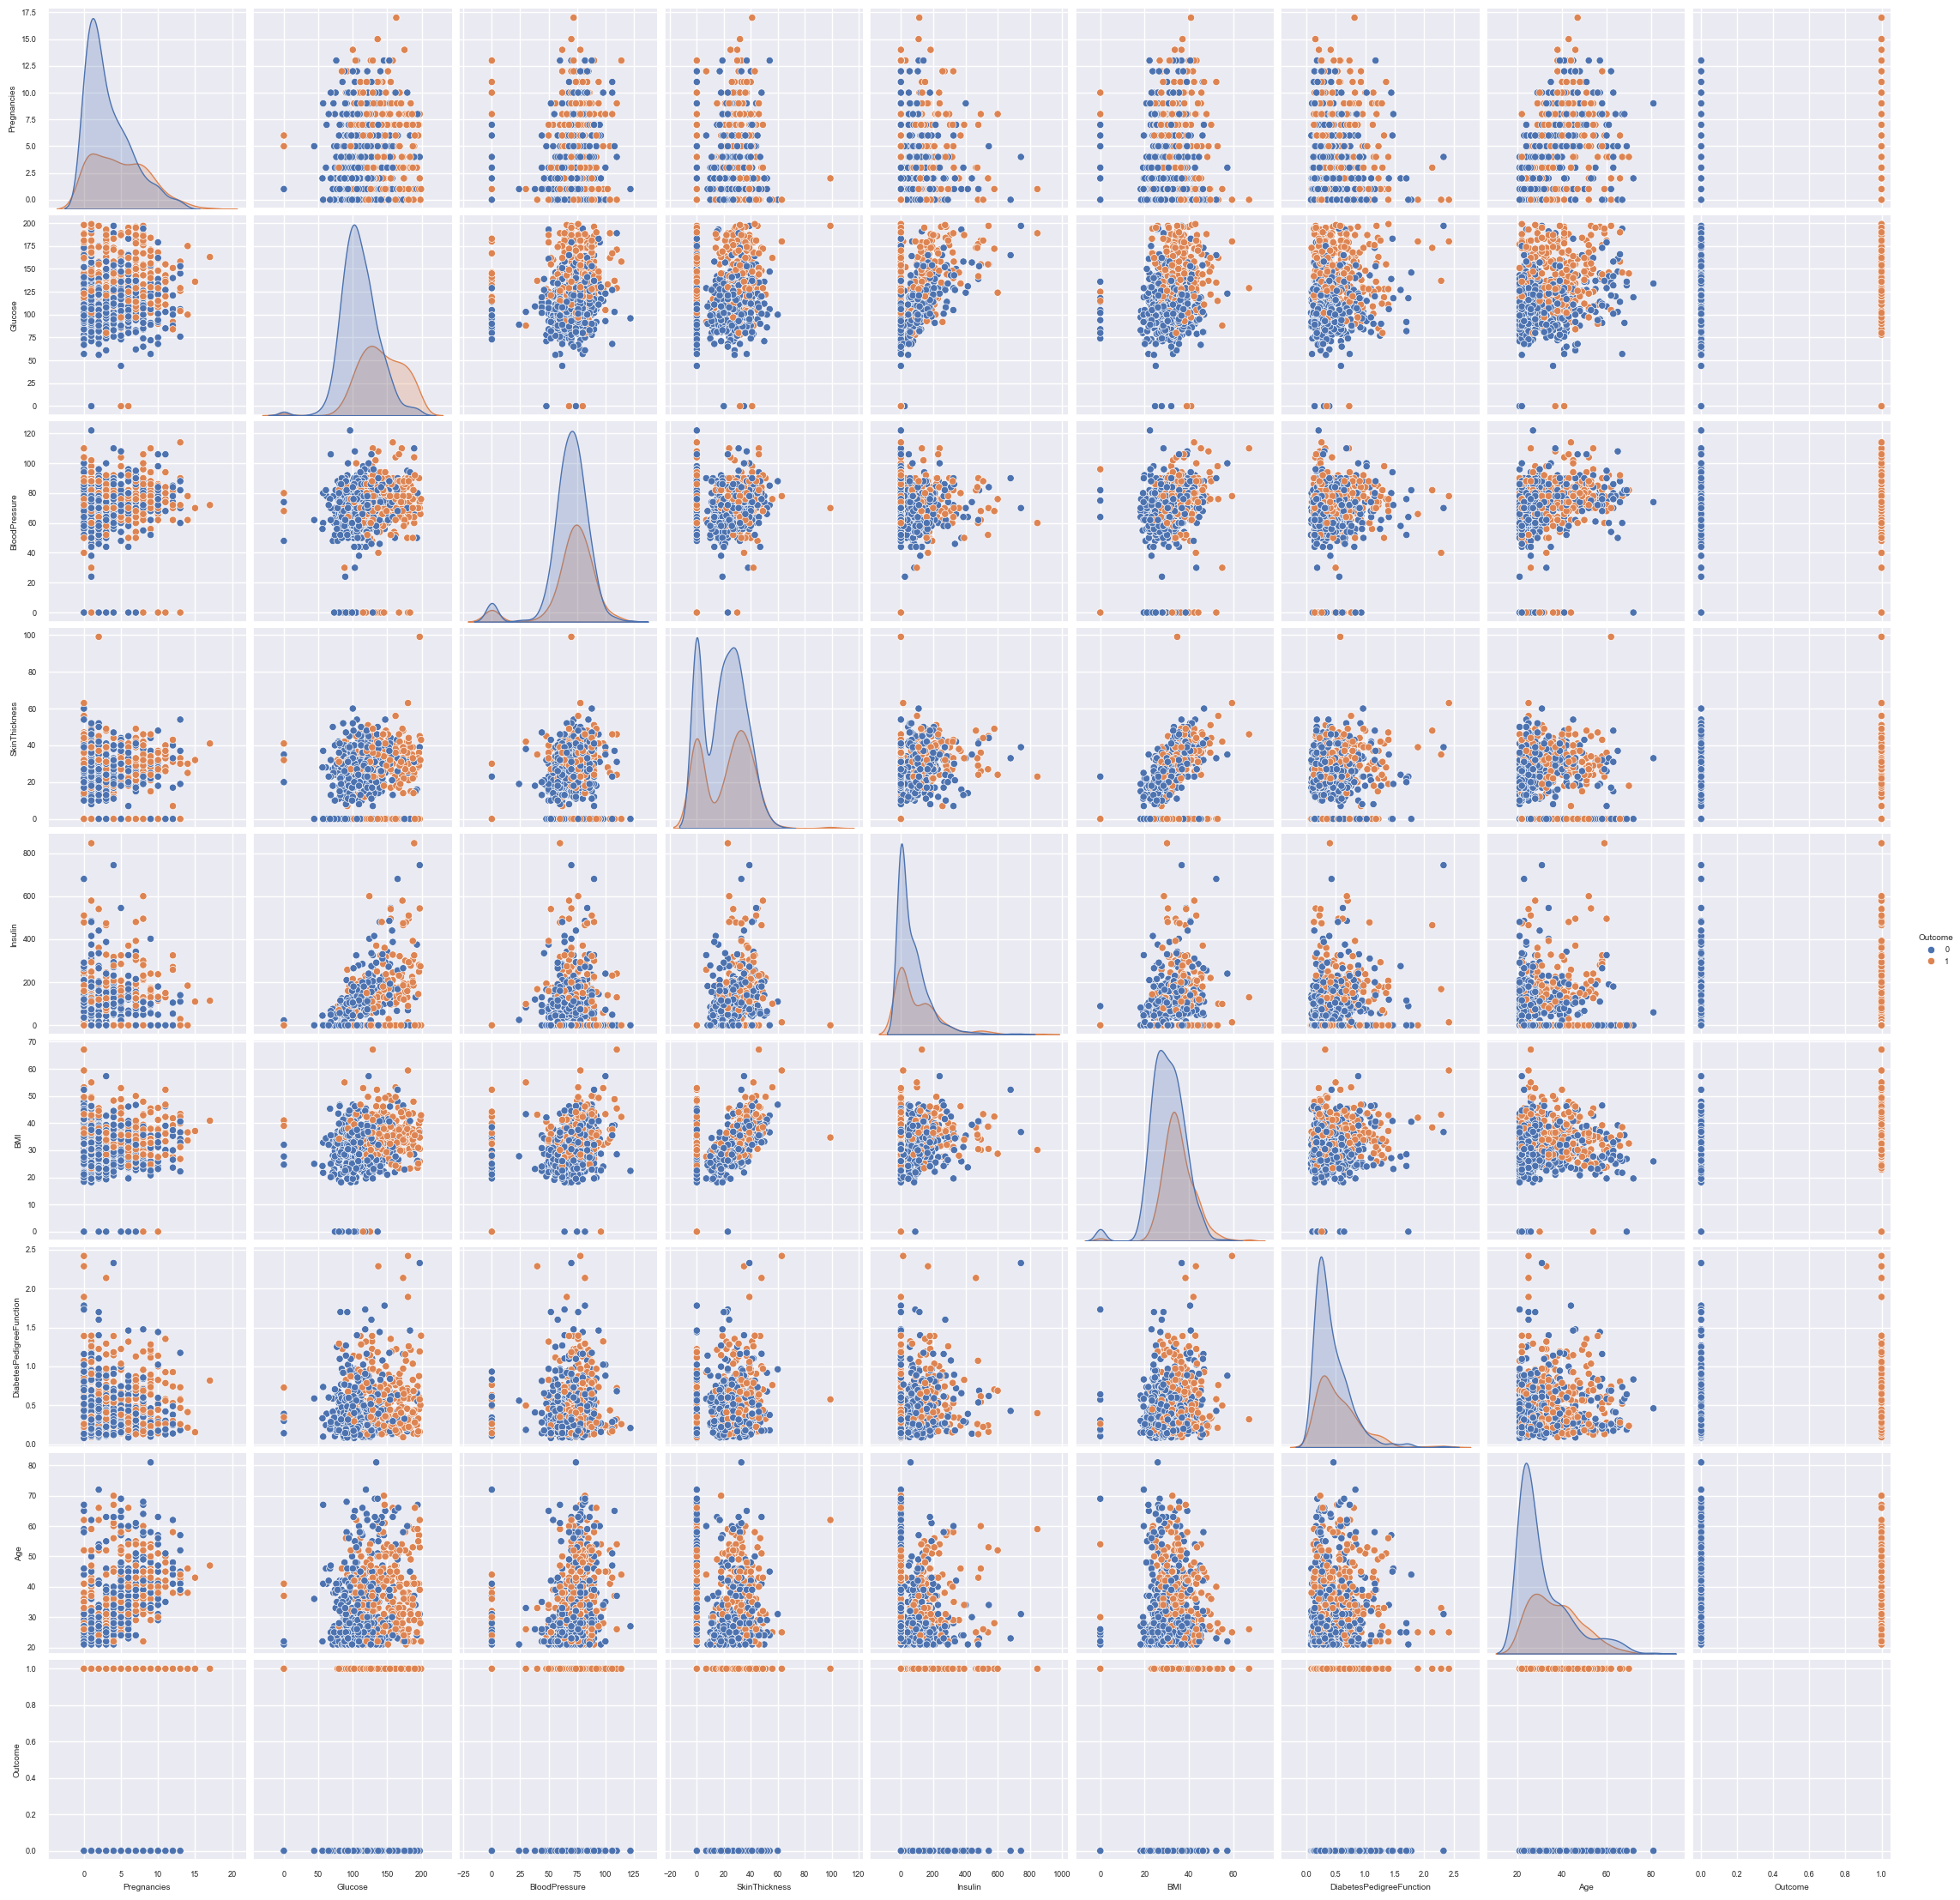

In [20]:
# Check the correlations - sol2. pairplot
sns.pairplot(data=df,
             vars=df.columns,
             hue='Outcome')
plt.show()

In [23]:
# cf. 해당 색상들이 순서대로 부여됨 즉, blue=>label 0이고 orange=>label 1
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

# 1. DL

### 1.0.0. Split the dataset

In [47]:
# 1. Split the dataset into features(X) and label(y)
# 2. convert pandas-DataFrame to numpy-ndarray
X = df.drop(['Outcome'], axis=1).to_numpy()
y = df['Outcome'].to_numpy()

print(f"X is {type(X)}, y is {type(y)} \n")
print(f"X.head: \n{X[:5]} \n")
print(f"y.head: \n{y[:5]} \n")

X is <class 'numpy.ndarray'>, y is <class 'numpy.ndarray'> 

X.head: 
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]] 

y.head: 
[1 0 1 0 1] 



> **cf. [pandas.DataFrame.drop — pandas 2.2.2 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)**  
Drop specified labels from rows or columns.  
Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. When using a multi-index, labels on different levels can be removed by specifying the level. See the user guide for more information about the now unused levels.    
**cf. [09-04. 행/열 삭제 (drop) - [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복](https://wikidocs.net/154050)**

> **cf. [pandas.DataFrame.to_numpy — pandas 2.2.2 documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html)**  
Convert the DataFrame to a NumPy array.  
By default, the dtype of the returned array will be the common NumPy dtype of all types in the DataFrame. For example, if the dtypes are float16 and float32, the results dtype will be float32. This may require copying data and coercing values, which may be expensive.
>    > **`.to_numpy()` 대신에 `.values`를 사용하는 코드들도 존재한다.**  
>    > **cf. [DOC: warning against use of .values should show difference compared to to_numpy()/array · Issue #48425 · pandas-dev/pandas](https://github.com/pandas-dev/pandas/issues/48425)**  
>    > Both methods will produce the same output. However, `.to_numpy()` is preferred for its flexibility and better integration with Pandas.

In [28]:
from sklearn.model_selection import train_test_split

# Split X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    shuffle=True,
                                                    random_state=42)

print(f"X_train: Shape {X_train.shape} \nX_test:  Shape {X_test.shape}")
print(f"y_train: Shape {y_train.shape} \ny_test:  Shape {y_test.shape}")

X_train: Shape (614, 8) 
X_test:  Shape (154, 8)
y_train: Shape (614,) 
y_test:  Shape (154,)


### 1.0.1. Standardization

In [46]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train.head: \n{X_train[:3]} \n")
print(f"X_train_scaled.head: \n{X_train_scaled[:3]}")
# print(X_test_scaled[:3])

X_train.head 
[[  1.     90.     62.     12.     43.     27.2     0.58   24.   ]
 [  5.    126.     78.     27.     22.     29.6     0.439  40.   ]
 [  2.    105.     58.     40.     94.     34.9     0.225  25.   ]] 

X_train_scaled.head 
[[-0.85135507 -0.98013068 -0.40478372 -0.55397256 -0.33131928 -0.60767846
   0.31079384 -0.79216928]
 [ 0.35657564  0.16144422  0.46536842  0.392787   -0.52639809 -0.30213902
  -0.11643851  0.56103382]
 [-0.5493724  -0.50447447 -0.62232176  1.21331196  0.14244354  0.3725939
  -0.76486207 -0.70759409]]


## 1.1. CNN; Convolutinal Neural Network

In [54]:
# Convert to Sequential Data
# step1. define the converting function
def split_sequences(sequences, n_steps):
    # parameters
      # sequences: 기존 data instance들이 있는 array
      # n_steps  : 기존 data instance 몇 개를 하나로 묶을 것인지
    X = [] # sequential로 바뀔 array
    y = [] # sequential로 바뀔 array

    for i in range(len(sequences)): # 기존 array의 data instance 수
        end_idx = i + n_steps # (i+1)번 째 묶었을 때의 끝 index
        if (end_idx > len(sequences)): break # 끝까지 다 묶으면 break

        # i부터 end_idx까지 즉, 묶을 data instance 단위를 말함
        # [[x1, x2, x3, y], [x1, x2, x3, y], [x1, x2, x3, y]]
        seq_x = sequences[i:end_idx, :-1]
        seq_y = sequences[i:end_idx, -1]

        # 묶은 애들을 Sequential Dataset의 instance로 추가
        X.append(seq_x)
        y.append(seq_y)

    return np.array(X), np.array(y) # 완성된 Sequential Dataset을 return

**cf. `split_sequences(sequences, n_steps)` function**  
**parameters**  
* `sequences`: 기존 data instance들이 있는 array
* `n_steps`: 기존 data instance 몇 개를 하나로 묶을 것인지(3이라고 가정)

**`seq_x = sequences[i:end_idx, :-1]`**  
* 전체 dataset을 array로 나타낸 sequences는 다음과 같다.  
  $[x^1, x^2, x^3, ...]$

* 이때 각 data에는 features와 label이 순서대로 있으므로 풀어내면 다음과 같다.  
  $[ [x^1_1, x^1_2, x^1_3, y^1], [x^2_1, x^2_2, x^2_3, y^2], [x^3_1, x^3_2, x^3_3, y^3], ... ]$

* 이때 `sequences[i:end_idx]`는 다음을 의미한다.  
  sequences의 i(1)번 째 data인 $x^1$부터 end_idx(4)번 째 data인 $x^4$까지 즉,  
  $[ [x^1_1, x^1_2, x^1_3, y^1], [x^2_1, x^2_2, x^2_3, y^2], [x^3_1, x^3_2, x^3_3, y^3] ]$

* 그리고 `sequences[i:end_idx, -1]`에서 `-1`은 각 data의 index 0부터 index -1 전 까지만 선택함을 의미한다. 즉,  
  index `0`은 $x_1$이고, index `-1`은 $y$이므로 그 전인 $x_3$까지를 선택한다.

* 따라서 `sequences[i:end_idx, -1]`은 다음과 같다.  
  $[ [x^1_1, x^1_2, x^1_3], [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3] ]$

**`X.append(seq_x)`**  
* 위 과정에 의해서 `seq_x`는 다음과 같다.  
  seq_x = $[ [x^1_1, x^1_2, x^1_3], [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3] ]$

* 따라서 `X.append(seq_x)`는 `seq_x`를 X의 첫 번째 data instance로 추가하라는 의미이다.

* 이를 반복하면 다음과 같다.
  - X의 첫 번째 data instance: $[ [x^1_1, x^1_2, x^1_3], [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3] ]$
  - X의 두 번째 data instance: $[ [x^2_1, x^2_2, x^2_3], [x^3_1, x^3_2, x^3_3], [x^4_1, x^4_2, x^4_3] ]$
  - X의 세 번째 data instance: $...$

In [48]:
# X와 y의 dimension 맞추기

# cf. X의 dimension은 2-dim이다
print(f"X_train_scaled: Shape {X_train_scaled.shape}") # prints (614, 8)
# cf. 하지만 y의 dimension은 1-dim이다
print(f"y_train: Shape {y_train.shape} \n")            # prints (614,)

# cf. X의 형태와 y의 형태 차이를 시각적으로 확인하기
print(f"X.head: \n{X[:5]} \n")
print(f"y.head: \n{y[:5]} \n")

print("===== convert y. 1dim -> 2dim ===== \n")

# y를 2-dim으로 변경하기
y_train_array = np.array(y_train).reshape(-1, 1)
y_test_array = np.array(y_test).reshape(-1, 1)
# 변경 확인
print(f"y_train_array: Shape {y_train_array.shape} \n") # prints (614, 1)
print(f"y_train_array.head: \n{y_train_array[:5]} \n")

X_train_scaled: Shape (614, 8)
y_train: Shape (614,) 

X.head: 
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]] 

y.head: 
[1 0 1 0 1] 

===== convert y. 1dim -> 2dim ===== 

y_train_array: Shape (614, 1) 

y_train_array.head: 
[[0]
 [0]
 [0]
 [0]
 [0]] 



> **cf. [numpy.reshape — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)**  
Gives a new shape to an array without changing its data.  
**cf. [001 ~ 010 - 데이터 분석 입문자를 위한 파이썬 판다스 300제](https://wikidocs.net/125545#reshape)**

In [52]:
# X와 y를 하나로 합쳐서 Dataset으로 만들기 for Convert to Sequential Data
  # cf. 합치기 위해서 위에서 X와 y의 dimension을 맞춘 것임

# (614, 8)_train_X과 (614, 1)_train_y를 합쳐서,
# (614, 9)의 train_dataset 만들기
train_dataset = np.c_[X_train, y_train_array]

# (154, 8)_train_X과 (154, 1)_train_y를 합쳐서,
# (154, 9)의 train_dataset 만들기
test_dataset = np.c_[X_test, y_test_array]

# 확인
print(f"train_dataset.shape: \n{train_dataset.shape} \n")
print(f"test_dataset.shape: \n{test_dataset.shape} \n")

train_dataset.shape: 
(614, 9) 

test_dataset.shape: 
(154, 9) 



> **cf. [numpy.c_ — NumPy v2.1 Manual](https://numpy.org/doc/stable/reference/generated/numpy.c_.html)**  
Translates slice objects to concatenation along the second axis.  
> ```python
> >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
> array([[1, 4],
>        [2, 5],
>        [3, 6]])
> ```

In [56]:
# Convert to Sequential Data

# 5개를 하나로 묶기
X_train_seq, y_train_seq = split_sequences(train_dataset, 5)
X_test_seq, y_test_seq = split_sequences(test_dataset, 5)

print(f"X_train_seq.shape: \n{X_train_seq.shape} \n")
print(f"X_test_seq.shape: \n{X_test_seq.shape} \n")

# data instance의 수가 614 -> 610, 154 -> 150으로 감소한 것에 주목
# sequential한 data instances 5개를 묶은 것이 하나의 data instance로 취급
# 즉, 하나의 data instance에는 features 8개짜리 5묶음이 있는 것

X_train_seq.shape: 
(610, 5, 8) 

X_test_seq.shape: 
(150, 5, 8) 



In [64]:
# sequential function 적용 확인
print(f"X_train_seq.head(2): \n{X_train_seq[:2]} \n")
print(f"y_train_seq.head(2): \n{y_train_seq[:2]} \n")

# 얼핏 잘못보면 y_train_seq가 one-hot encoded라고 보일 수도 있는데, 아님.

X_train_seq.head(2): 
[[[1.00e+00 9.00e+01 6.20e+01 1.20e+01 4.30e+01 2.72e+01 5.80e-01
   2.40e+01]
  [5.00e+00 1.26e+02 7.80e+01 2.70e+01 2.20e+01 2.96e+01 4.39e-01
   4.00e+01]
  [2.00e+00 1.05e+02 5.80e+01 4.00e+01 9.40e+01 3.49e+01 2.25e-01
   2.50e+01]
  [1.00e+00 1.46e+02 5.60e+01 0.00e+00 0.00e+00 2.97e+01 5.64e-01
   2.90e+01]
  [0.00e+00 9.50e+01 6.40e+01 3.90e+01 1.05e+02 4.46e+01 3.66e-01
   2.20e+01]]

 [[5.00e+00 1.26e+02 7.80e+01 2.70e+01 2.20e+01 2.96e+01 4.39e-01
   4.00e+01]
  [2.00e+00 1.05e+02 5.80e+01 4.00e+01 9.40e+01 3.49e+01 2.25e-01
   2.50e+01]
  [1.00e+00 1.46e+02 5.60e+01 0.00e+00 0.00e+00 2.97e+01 5.64e-01
   2.90e+01]
  [0.00e+00 9.50e+01 6.40e+01 3.90e+01 1.05e+02 4.46e+01 3.66e-01
   2.20e+01]
  [5.00e+00 1.89e+02 6.40e+01 3.30e+01 3.25e+02 3.12e+01 5.83e-01
   2.90e+01]]] 

y_train_seq.head(2): 
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]] 



In [63]:
# one-hot encoding
# step1. Define the one-hot encoding function
def one_hot_encoding(label_array):
    label_list = []
    for i in range(len(label_array)):
        label_list.append([0] * len(np.unique(label_array)))

    label_array_onehot = np.array(label_list)
    for j in range(len(label_list)):
        hot_idx = label_array[j]
        label_array_onehot[j][hot_idx] = 1

    return label_array_onehot

In [65]:
# one-hot encoding
# step2. call a function
y_train_seq_onehot = one_hot_encoding(y_train_seq)
y_test_seq_onehot = one_hot_encoding(y_test_seq)

# 결과 확인
print(type(y_train_onehot))
print(y_train_onehot[:3])

IndexError: arrays used as indices must be of integer (or boolean) type

In [71]:
# 2차원 배열에 대한 원-핫 인코딩 함수
def one_hot_encoding_2d(label_array):
    num_classes = len(np.unique(label_array))  # 클래스 개수 파악
    one_hot_encoded = []

    for row in label_array:
        one_hot_row = []
        for label in row:
            one_hot = [0] * num_classes
            one_hot[int(label)] = 1
            one_hot_row.append(one_hot)
        one_hot_encoded.append(one_hot_row)

    return np.array(one_hot_encoded)

In [73]:
y_train_seq_onehot = one_hot_encoding_2d(y_train_seq)
y_test_seq_onehot = one_hot_encoding_2d(y_test_seq)

# 결과 확인
print(type(y_train_seq_onehot))
print(y_train_seq_onehot[:3])

<class 'numpy.ndarray'>
[[[1 0]
  [1 0]
  [1 0]
  [1 0]
  [1 0]]

 [[1 0]
  [1 0]
  [1 0]
  [1 0]
  [0 1]]

 [[1 0]
  [1 0]
  [1 0]
  [0 1]
  [0 1]]]
